In [277]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import pickle

In [278]:
#importing the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Rainfall.csv")

In [279]:
type(df)

pandas.core.frame.DataFrame

In [280]:
df.shape

(366, 12)

In [281]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [282]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [284]:
# removing the extra spaces in all columns
df.columns = df.columns.str.strip()

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [286]:
# removing the 'day' column
df.drop(columns = ['day'], inplace = True)

In [287]:
#checking the number of missing values
print(df.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [288]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [289]:
#handling missing values
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [291]:
#changing the categorical value into numerical
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no':0})

In [292]:
df.tail()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


In [293]:
# setting plot style for all the plots
sns.set(style = 'whitegrid')

In [294]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


<function matplotlib.pyplot.show(close=None, block=None)>

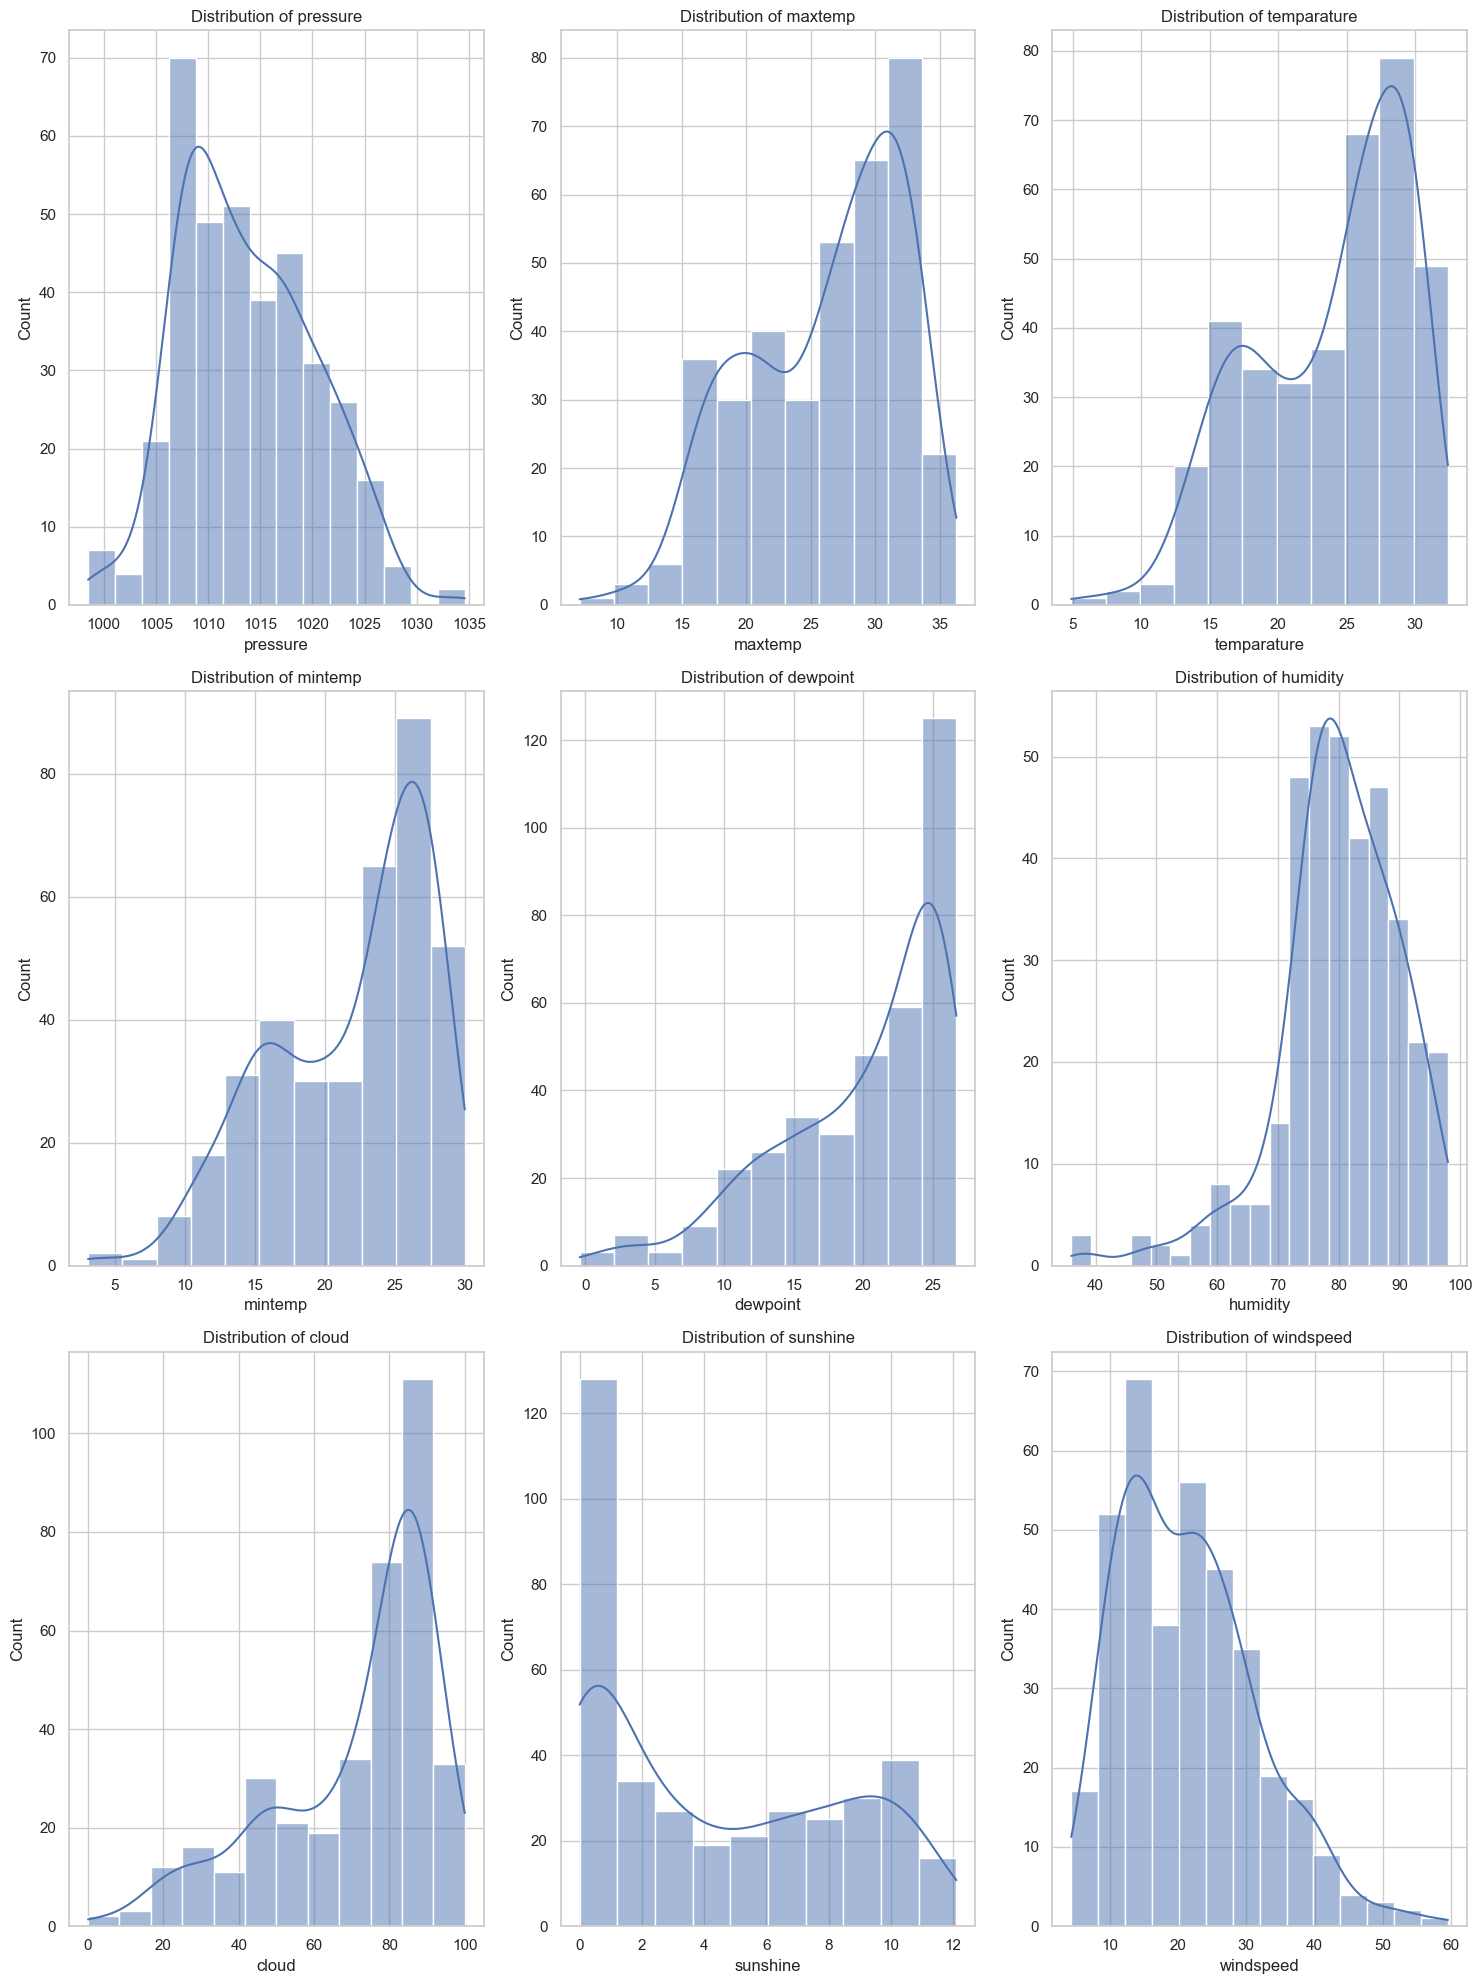

In [295]:
plt.figure(figsize = (15, 20))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine', 'windspeed'],1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show



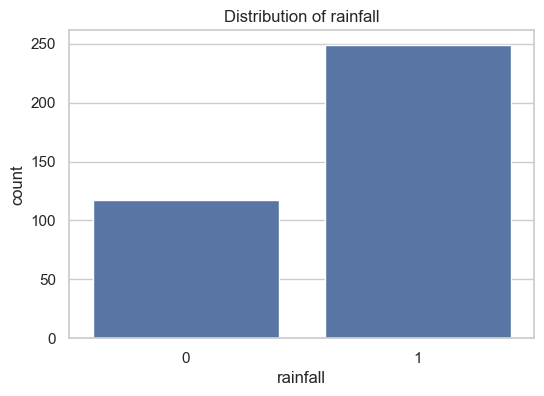

In [296]:
plt.figure(figsize = (6, 4))
sns.countplot(x = 'rainfall', data = df)
plt.title("Distribution of rainfall")
plt.show()

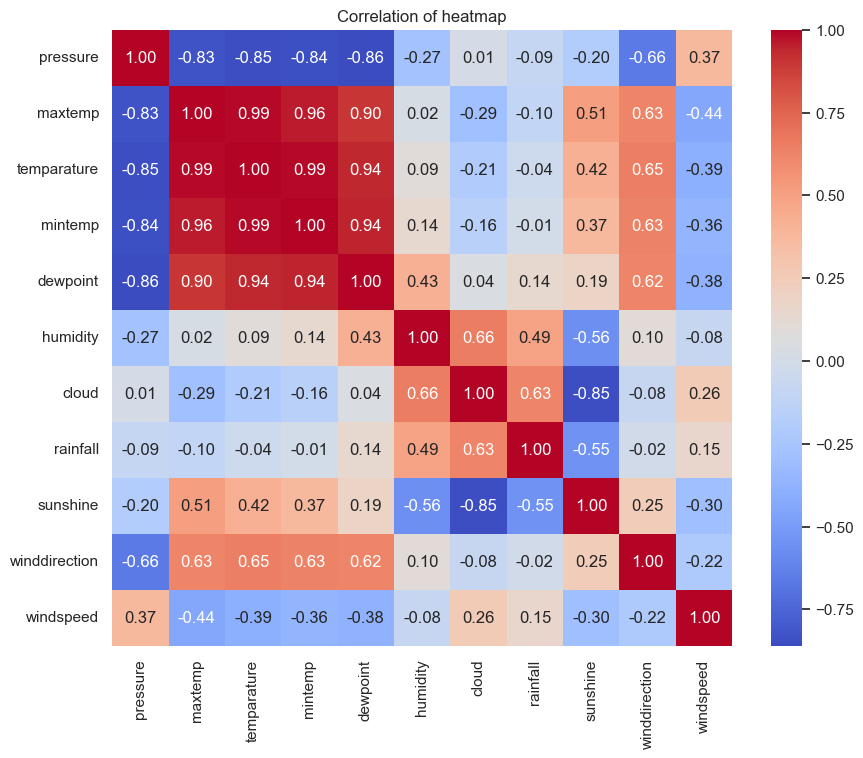

In [297]:
# correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation of heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

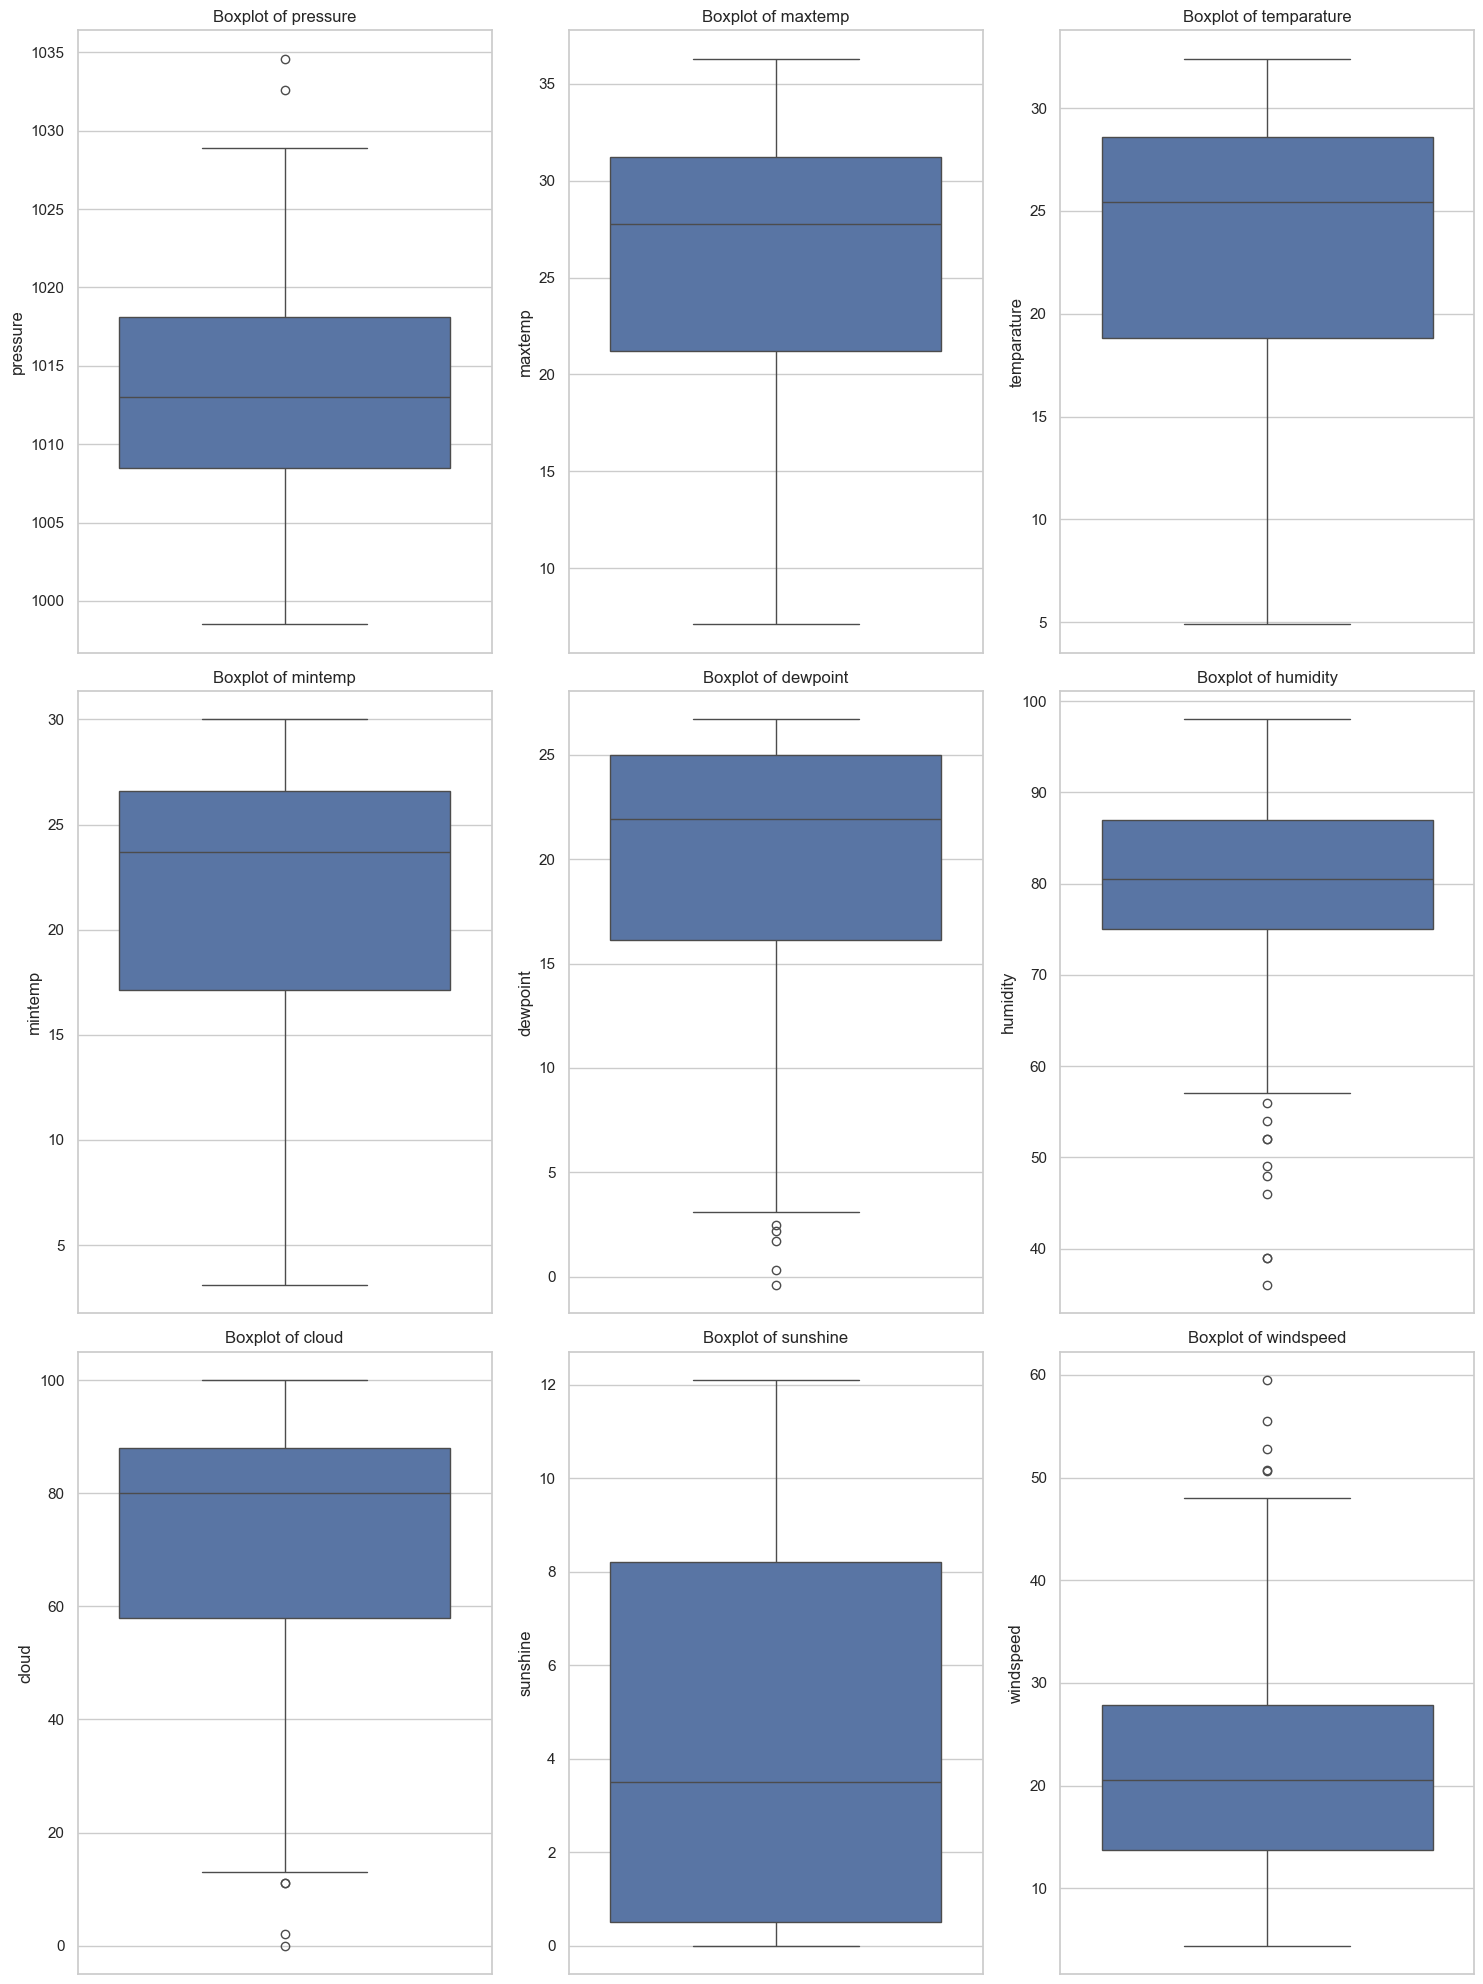

In [298]:
plt.figure(figsize = (15, 20))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine', 'windspeed'],1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show

## Data Preprocessing

In [299]:
df = df.drop(columns = [ 'maxtemp', 'temparature', 'mintemp'] )

In [300]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [301]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [302]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [303]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [304]:
#downsample majority class to match minority class
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state = 42)

In [305]:
df_majority_downsampled.shape

(117, 8)

In [306]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [307]:
df_downsampled.shape

(234, 8)

In [308]:
#shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [309]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [310]:
# splitting the data into training and test data
X = df_downsampled.drop(columns = ['rainfall'])
y = df_downsampled['rainfall']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [312]:
rf_model = RandomForestClassifier(random_state = 42)
param_grid_rf = {
    "n_estimators":[50,100,200],
    "max_features":["sqrt", "log2"],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf": [1,2,4]
}

# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator = rf_model, param_grid=param_grid_rf, cv=5,n_jobs=1,verbose = 2)
grid_search_rf.fit(X_train, y_train)

In [313]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [314]:
cv_scores = cross_val_score(best_rf_model, X_train,y_train, cv = 5)
print("Cross-validation scores:", cv_scores)
print("Mean Cross-validation scores:", np.mean(cv_scores))


Cross-validation scores: [0.68 0.82 0.84 0.84 0.92]
Mean Cross-validation scores: 0.818918918918919


In [315]:
y_predict = best_rf_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_predict))
print("Test set confusion matrix:", confusion_matrix(y_test, y_predict))
print("Classification report:\n", classification_report(y_test, y_predict))

Test set accuracy: 0.7446808510638298
Test set confusion matrix: [[17  7]
 [ 5 18]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [320]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predict.reshape(-1, 1), y_test.values.reshape(-1, 1)), axis=1))


[[1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]]


## Prediction on unknown data

In [317]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [321]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

In [322]:
prediction = best_rf_model.predict(input_df)
print(prediction)

[1]


In [323]:
model_data = {'model': best_rf_model, 'feature_names': X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
    pickle.dump(model_data, file)


## Load the save model and file and use it for prediction

In [324]:
import pickle
import pandas as pd

In [330]:
pickle.dump(model_data,open('rainfall_prediction_model.pkl','wb'))

In [336]:
pickled_model =pickle.load(open('rainfall_prediction_model.pkl', 'rb'))

In [340]:
# Extract the model from the dictionary
model = pickled_model['model']




In [341]:
model.predict(input_df)

array([1])